___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Docs/DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [6]:
# CODE HERE

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [8]:
# CODE HERE

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [10]:
# CODE HERE

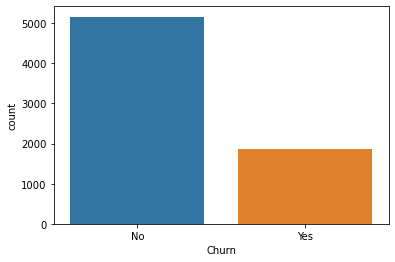

In [11]:
sns.countplot(
    data=df, 
    x='Churn'
);

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

In [12]:
# CODE HERE

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

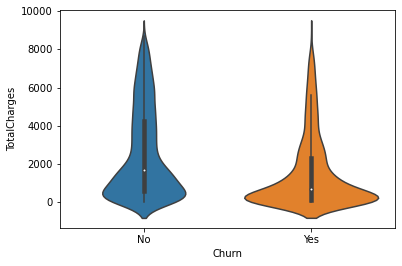

In [13]:
sns.violinplot(
    data=df,
    x='Churn',
    y='TotalCharges'
)

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [14]:
#CODE HERE

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

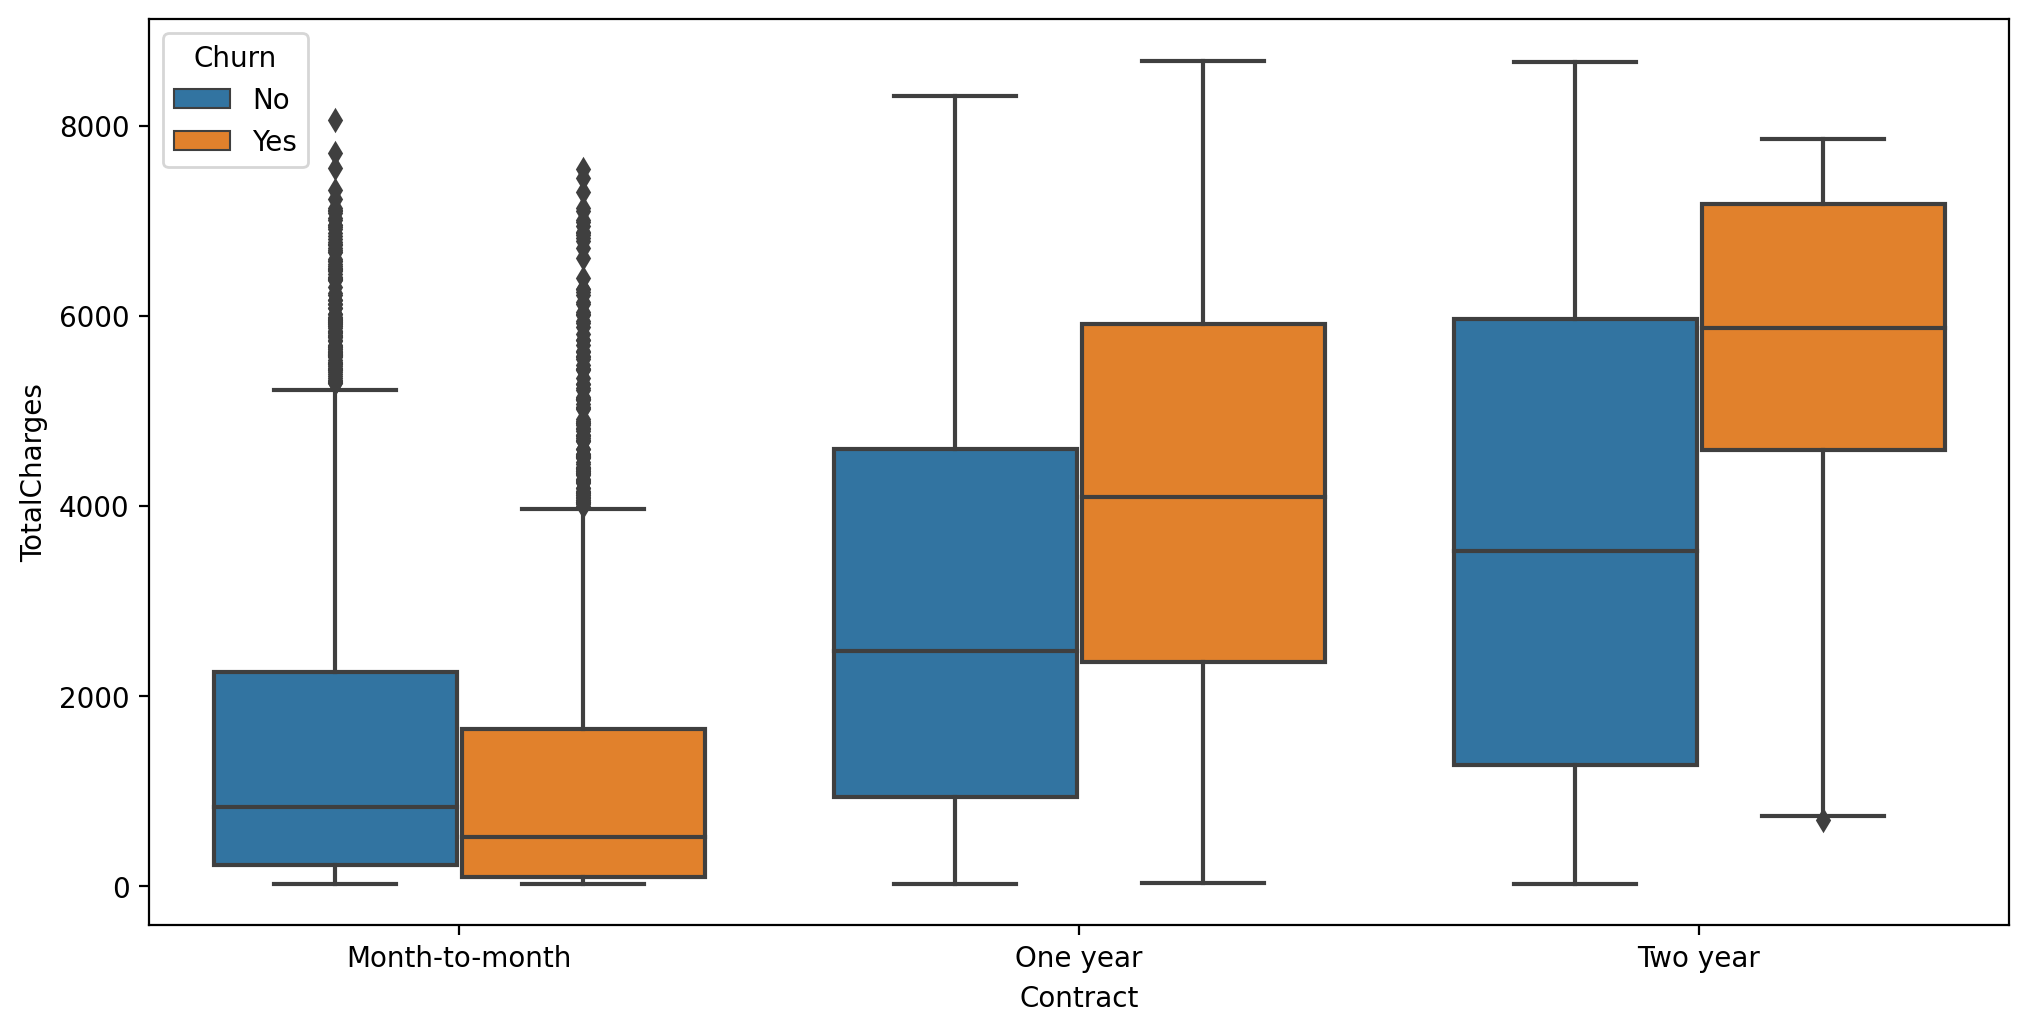

In [15]:
plt.figure(
    figsize=(12, 6),
    dpi=200
)
sns.boxplot(
    data=df,
    x='Contract',
    y='TotalCharges',
    hue='Churn'
)

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [16]:
corr_df=pd.get_dummies(
    data=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']],
).corr()


corr_df['Churn_Yes'].sort_values().iloc[1:-1]

corr_df=corr_df['Churn_Yes'].sort_values().iloc[1:-1]

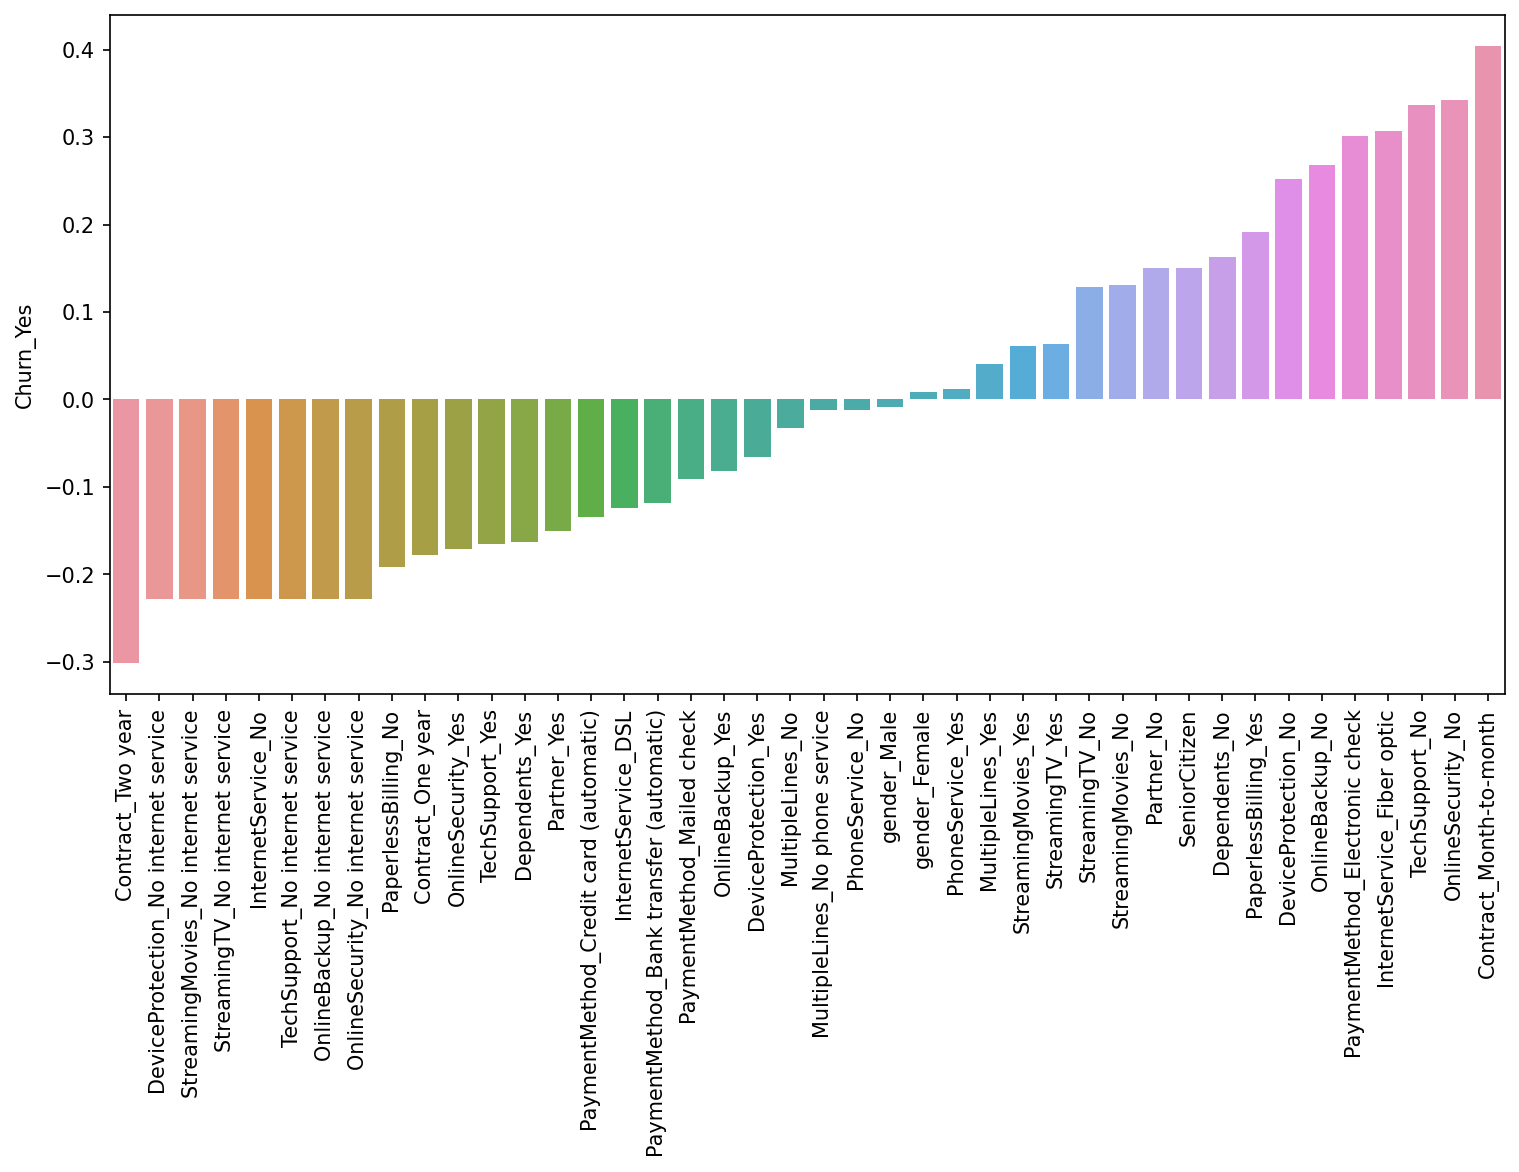

In [17]:
plt.figure(
    figsize=(12, 6),
    dpi=150
)

sns.barplot(
    x=corr_df.index,
    y=corr_df
)

plt.xticks(
    rotation=90
);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [18]:
# CODE HERE

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

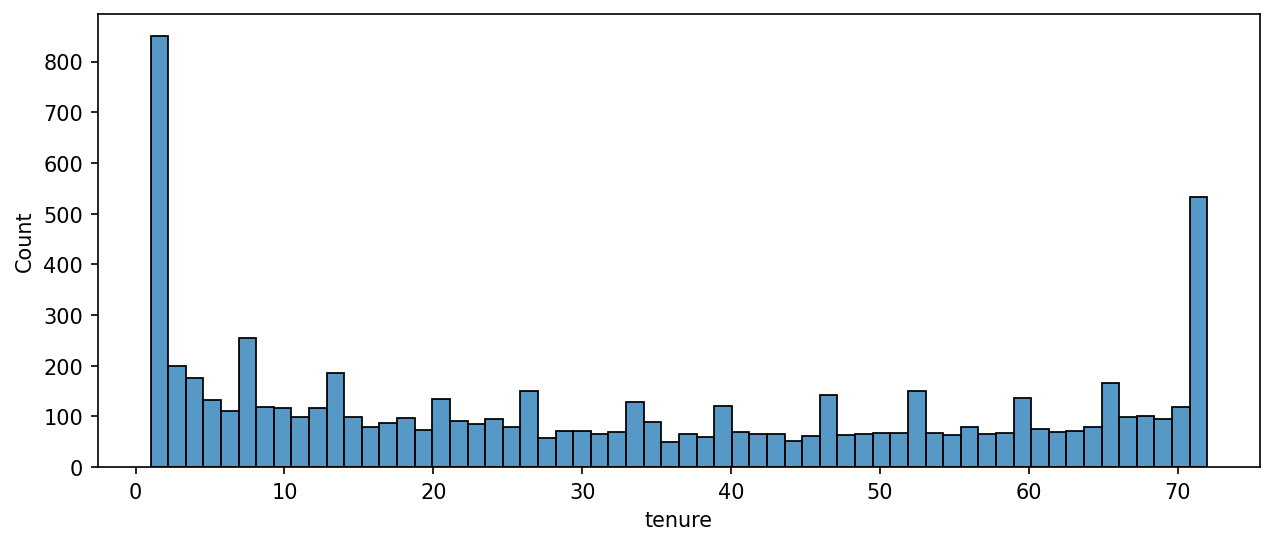

In [20]:
plt.figure(
    figsize=(10, 4),
    dpi=150
)
sns.histplot(
    data=df,
    x='tenure',
    bins=60
);

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [21]:
#CODE HERE

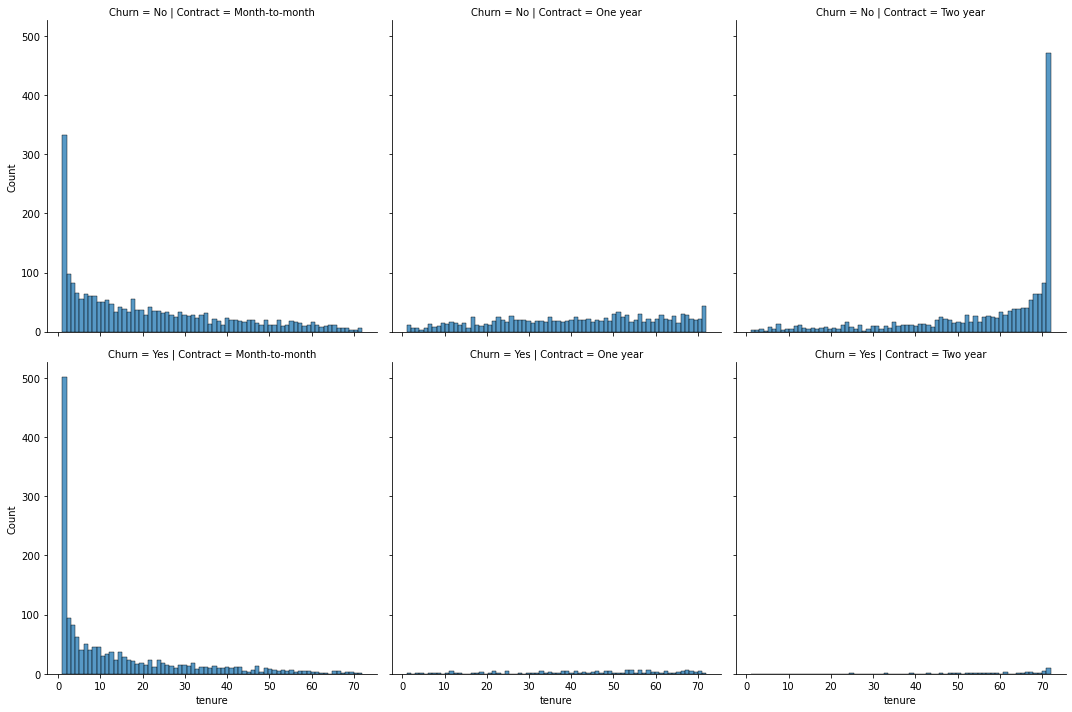

In [22]:
sns.displot(
    data=df, 
    x='tenure',
    bins=70,
    col='Contract',
    row='Churn'
);

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [23]:
#CODE HERE

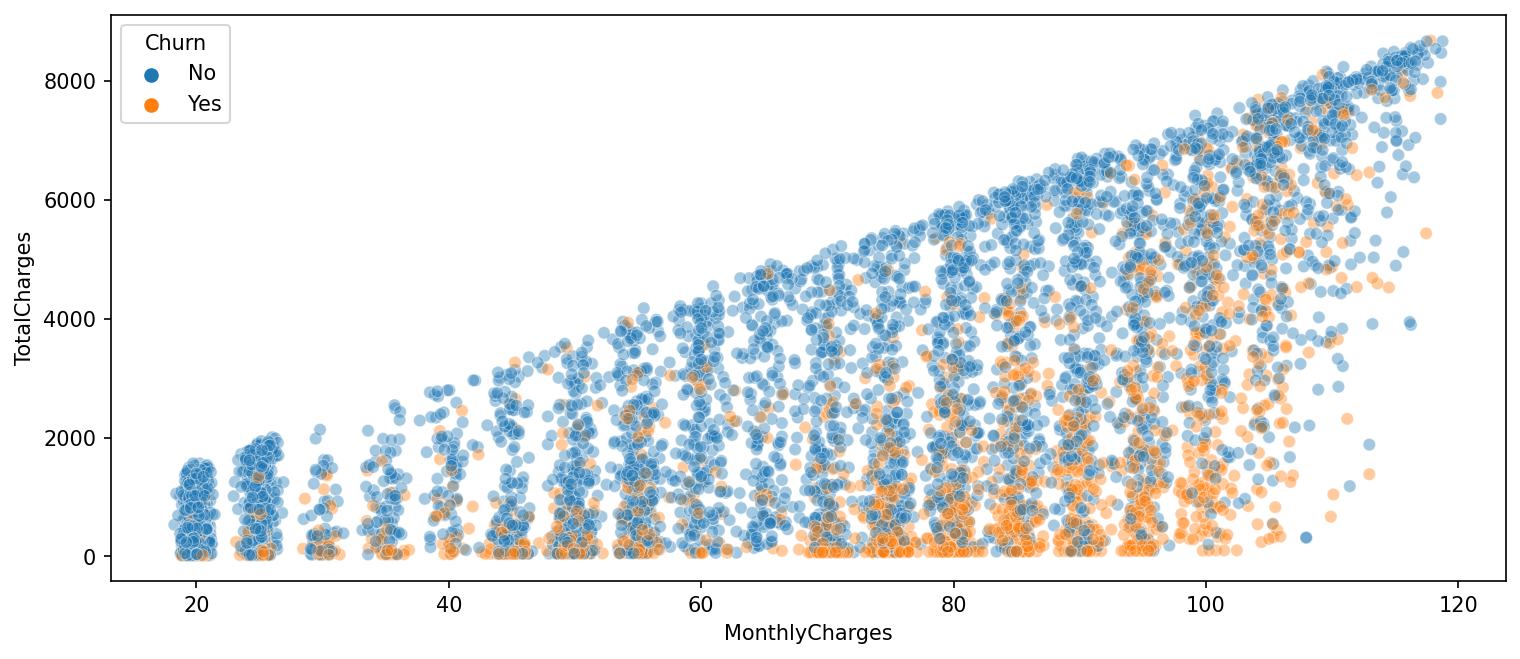

In [24]:
plt.figure(
    figsize=(12, 5),
    dpi=150
)

sns.scatterplot(
    data=df,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',
    alpha=0.4
);

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [25]:
#CODE HERE

In [26]:
rate_df=df[['Churn', 'tenure']]
total_df=rate_df.set_index('tenure').groupby(level='tenure', axis=0).count()

rate_df['Churn']=(rate_df['Churn']=='Yes')
yes_df=rate_df.set_index('tenure').groupby(level='tenure', axis=0).sum()

res_df=total_df
res_df['churn_rate']=(yes_df['Churn']*100)/total_df['Churn']
res_df['churn_rate']

C:\Users\agraw\envs\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: churn_rate, Length: 72, dtype: float64

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [27]:
#CODE HERE

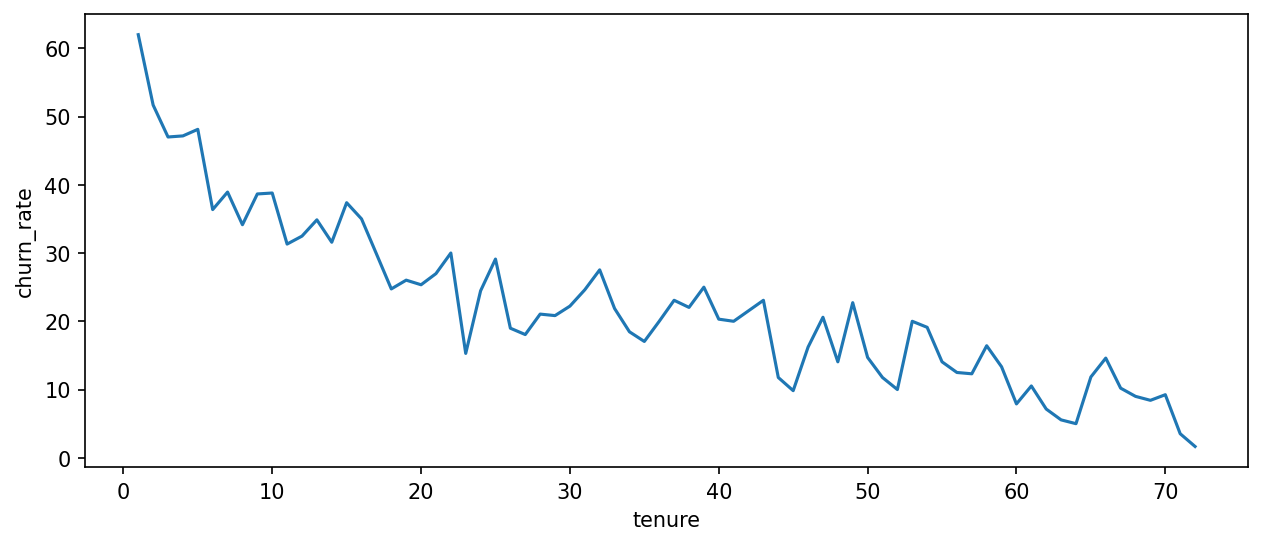

In [28]:
plt.figure(
    figsize=(10, 4),
    dpi=150
)

sns.lineplot(
    data=res_df,
    x='tenure',
    y='churn_rate'
);

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [167]:
# CODE HERE

In [29]:
def cohort(tenure):
    if tenure<=12:
        return '0-12 Months';
    
    elif tenure<=24:
        return '12-24 Months';
    
    elif tenure<=48:
        return '24-48 Months';
    
    else:
        return 'Over 48 Months' ;

In [30]:
df['Tenure Cohort']=df['tenure'].apply(cohort)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months



**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [171]:
#CODE HERE

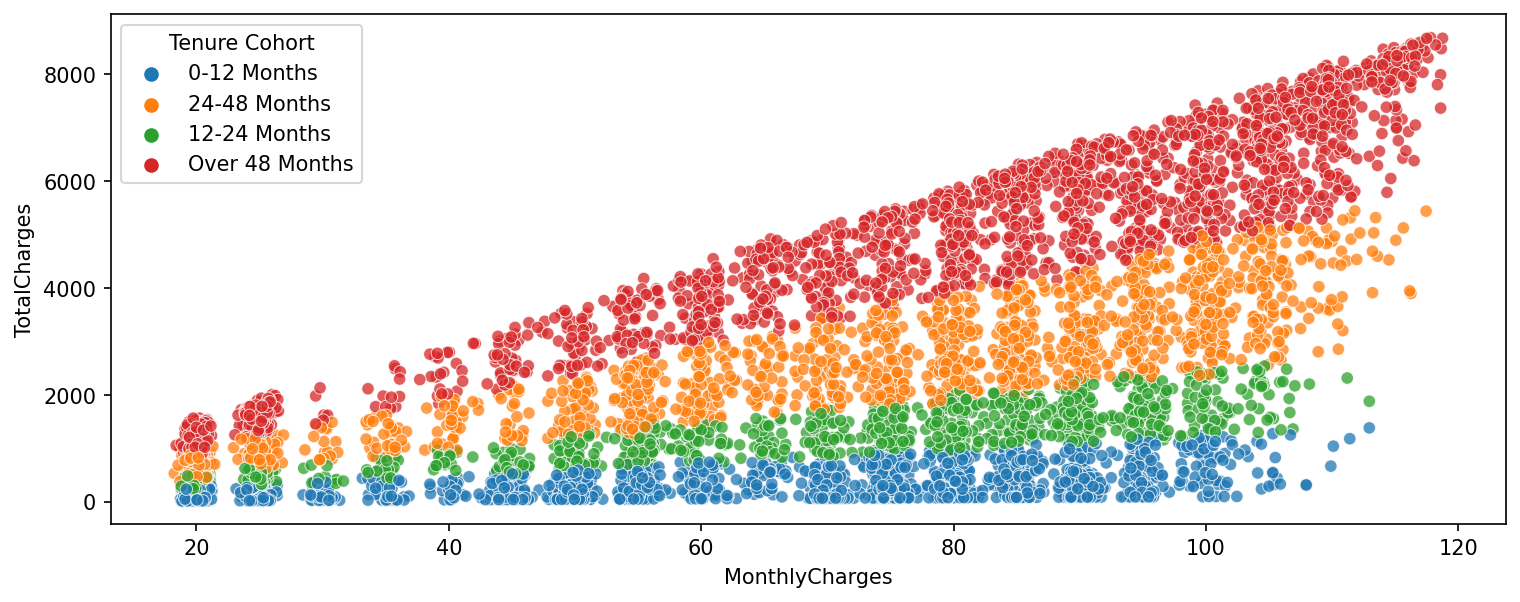

In [31]:
plt.figure(
    dpi=150,
    figsize=(12, 4.5)
)

sns.scatterplot(
    data=df,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Tenure Cohort',
    alpha=0.75
);

**TASK: Create a count plot showing the churn count per cohort.**

In [32]:
# CODE HERE

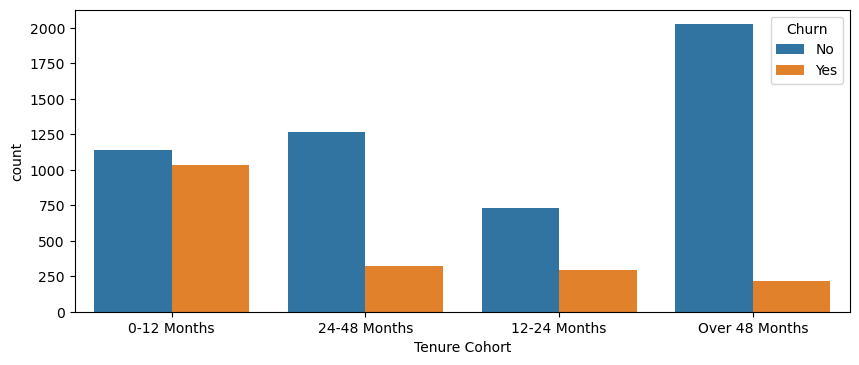

In [33]:
plt.figure(
    dpi=100,
    figsize=(10,4)
)

sns.countplot(
    data=df,
    x='Tenure Cohort',
    hue='Churn'
);

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [34]:
#CODE HERE

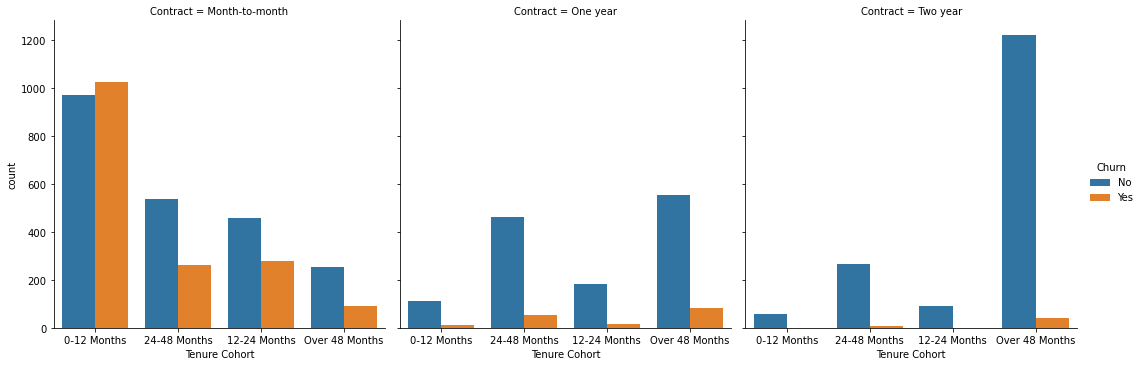

In [35]:
sns.catplot(
    data=df, 
    x='Tenure Cohort',
    hue='Churn',
    col='Contract',
    kind='count'
);

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [178]:
#CODE HERE

In [38]:
X=df.drop(['Churn', 'customerID'], axis=1);
X=pd.get_dummies(X, drop_first=True)

In [ ]:
y=df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier(
    max_depth=6,
)

In [49]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [50]:
preds=dt.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [52]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



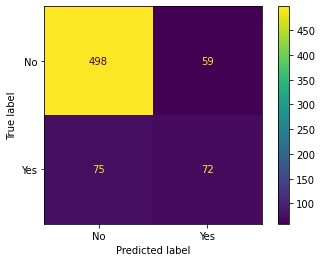

In [56]:
plot_confusion_matrix(dt, X_test, y_test);

In [57]:
dt.feature_importances_

array([0.0126805 , 0.42391407, 0.04492202, 0.06350564, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [61]:
imp_feats=pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feature Importance'])
imp_feats=imp_feats.sort_values('Feature Importance')
imp_feats

,Feature Importance
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000


In [63]:
imp_feats=imp_feats[imp_feats['Feature Importance']>0]
imp_feats

,Feature Importance
PhoneService_Yes,0.000890
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.006962
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
MultipleLines_Yes,0.012432
SeniorCitizen,0.012680
StreamingMovies_No internet service,0.026290


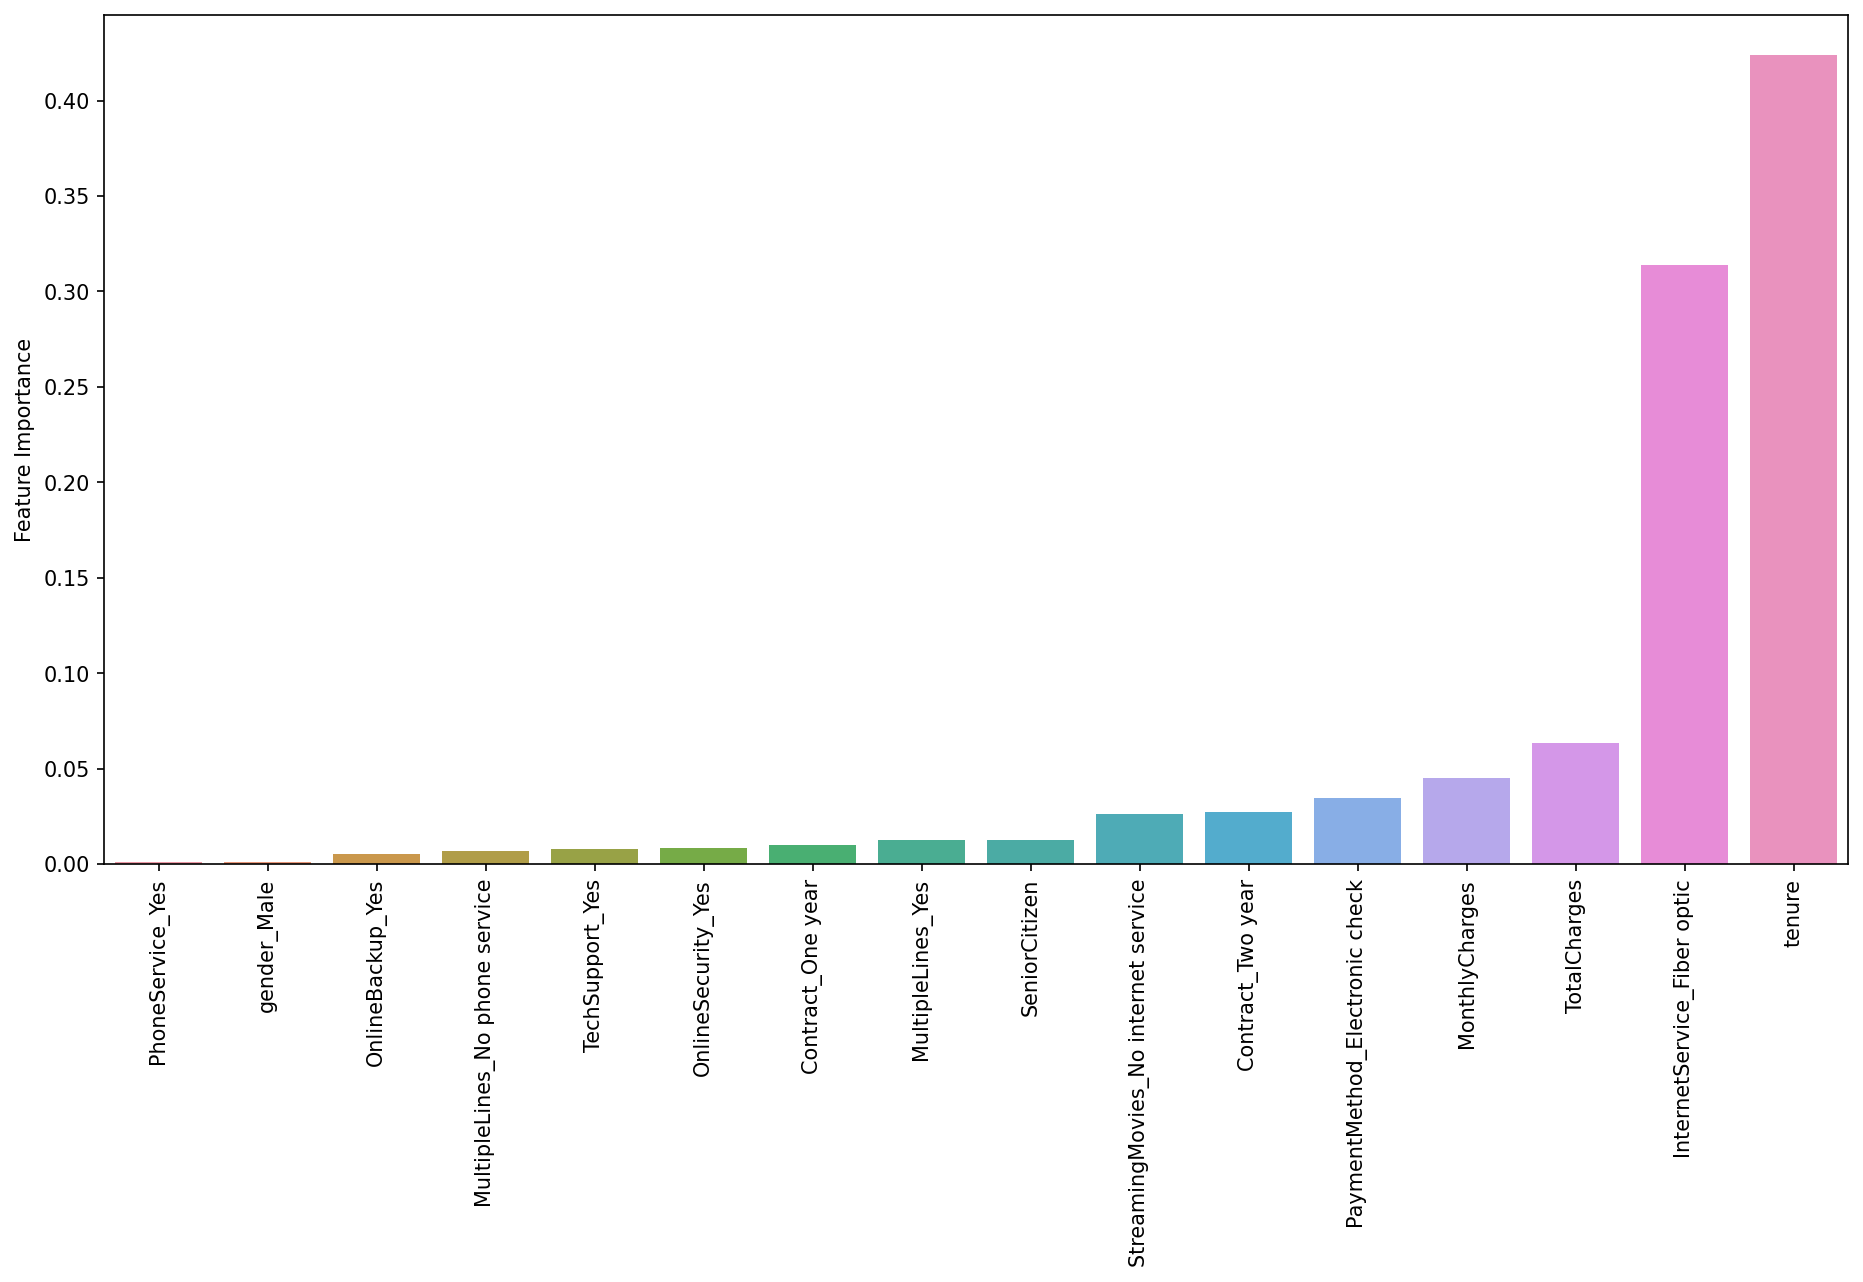

In [75]:
plt.figure(
    figsize=(15, 7.5),
    dpi=150
)

sns.barplot(
    data=imp_feats,
    x=imp_feats.index,
    y='Feature Importance'
);

plt.xticks(
    rotation=90
);

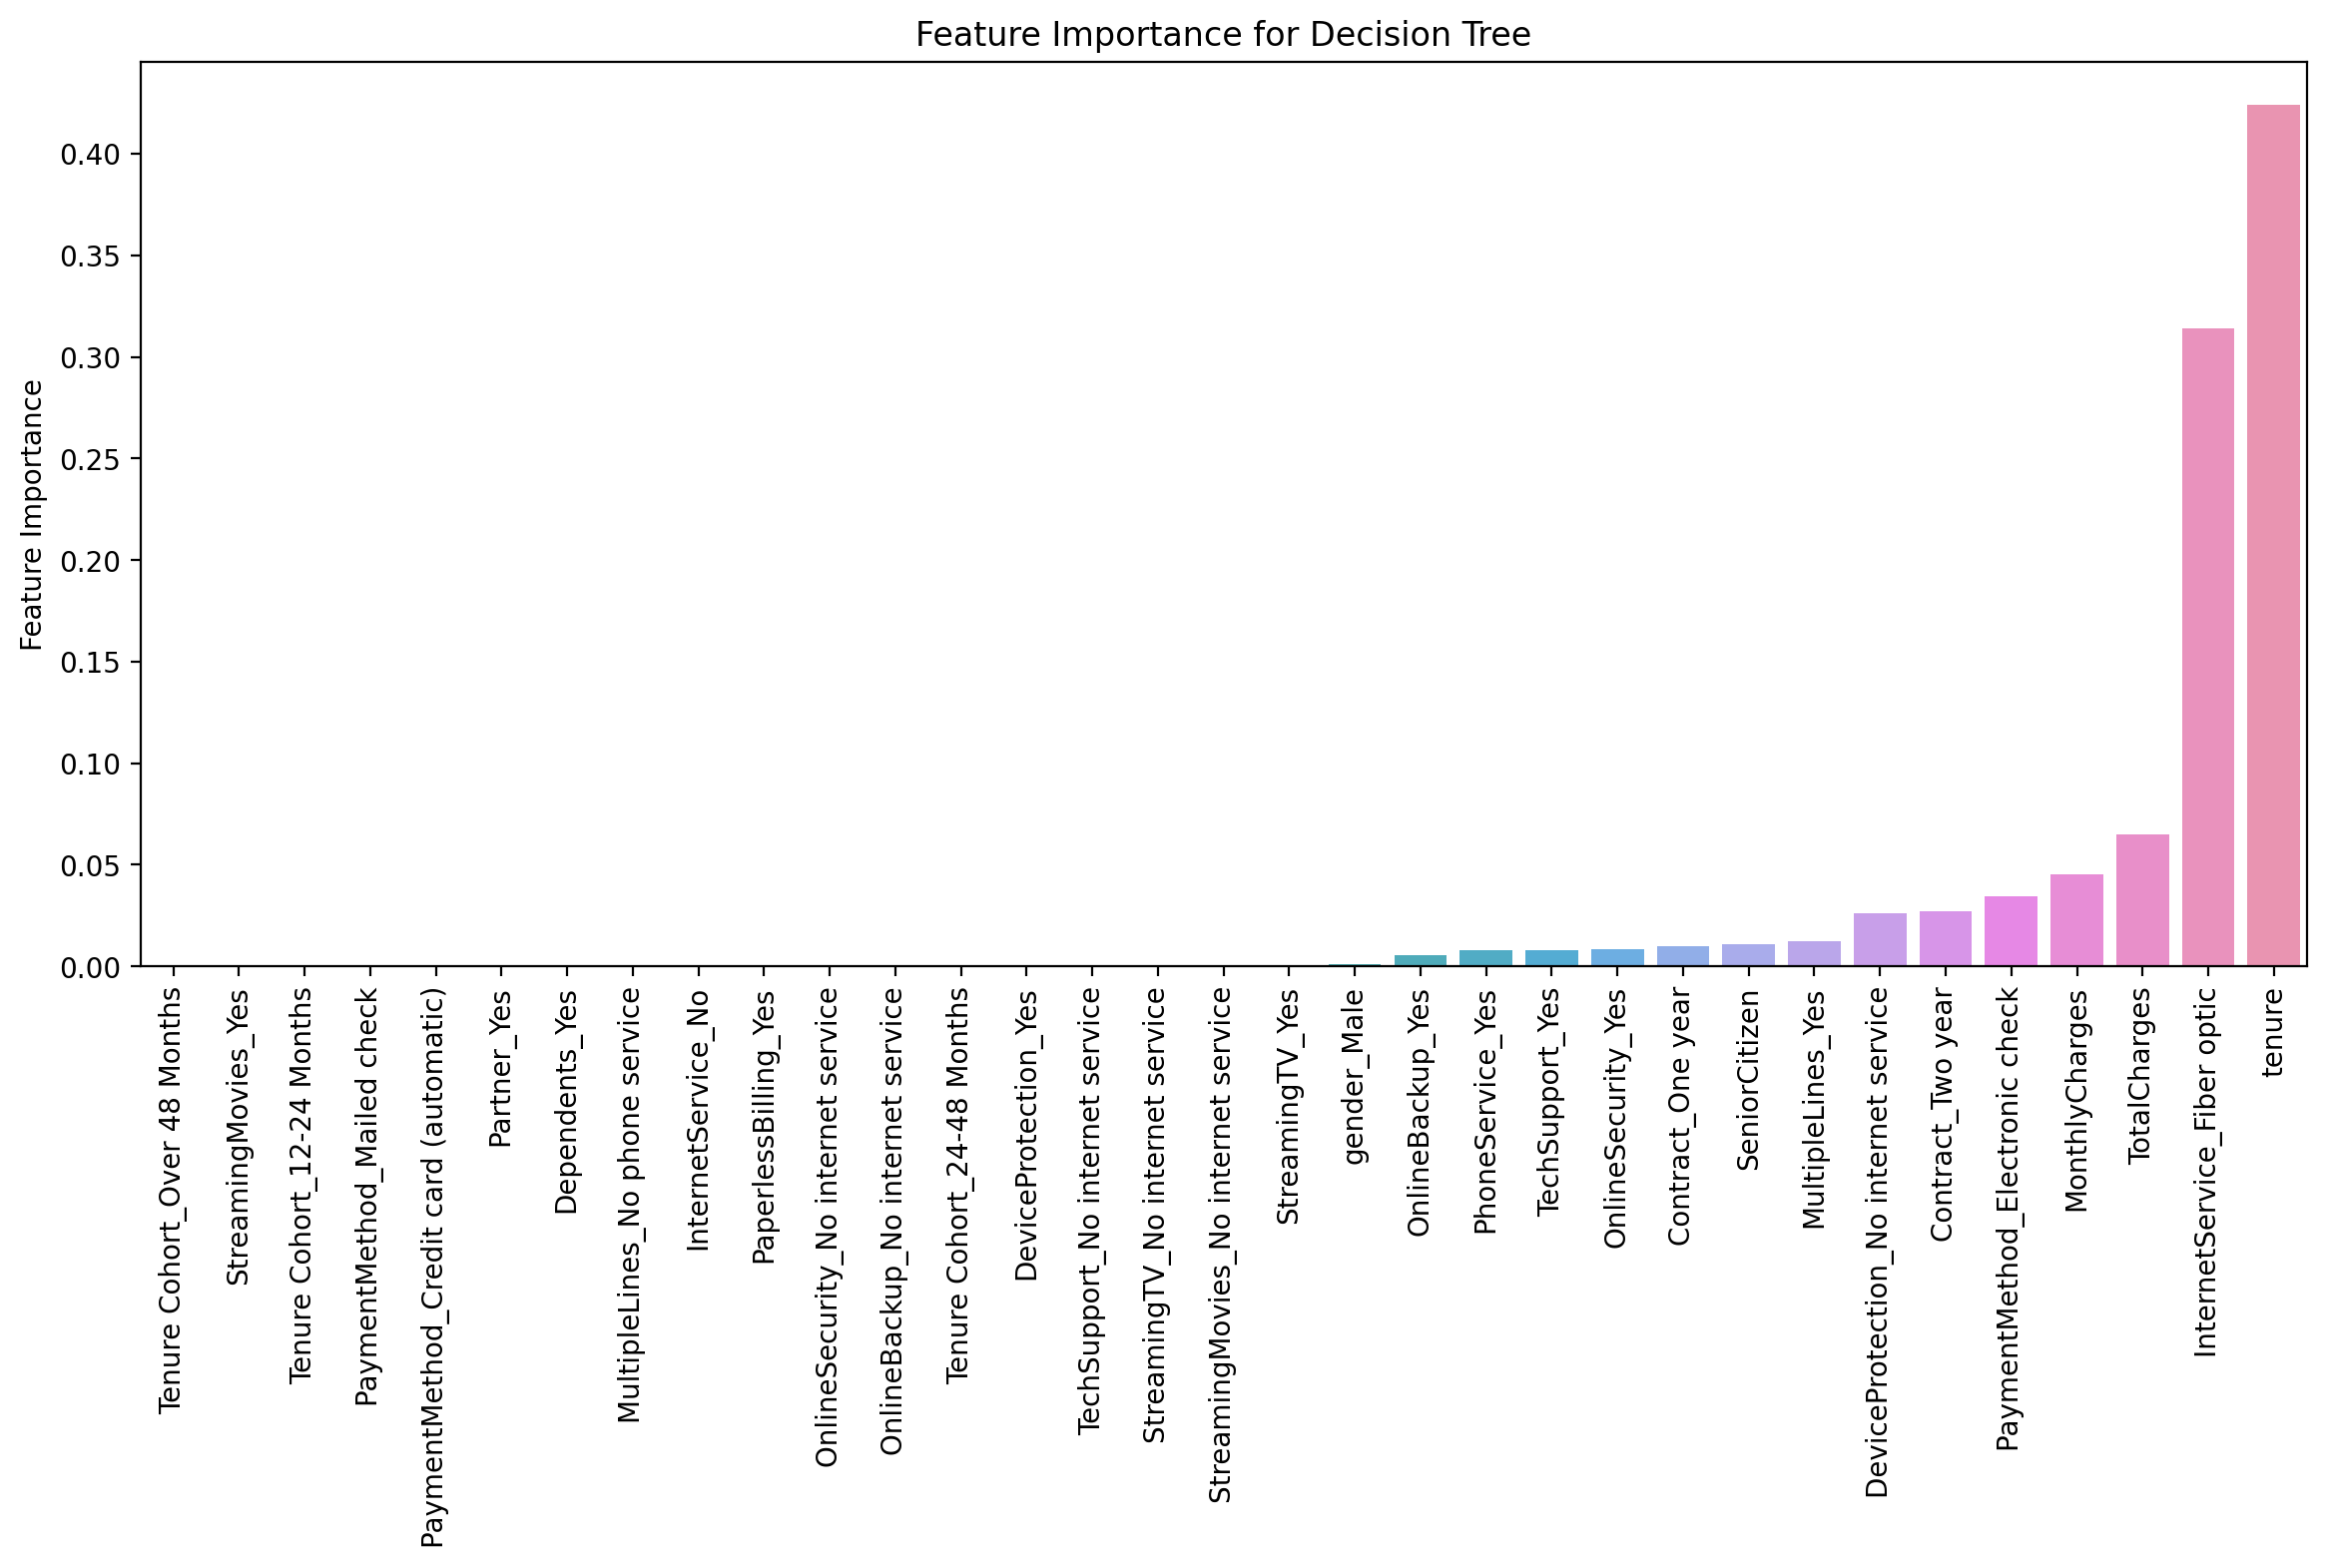

In [76]:
from sklearn.tree import plot_tree

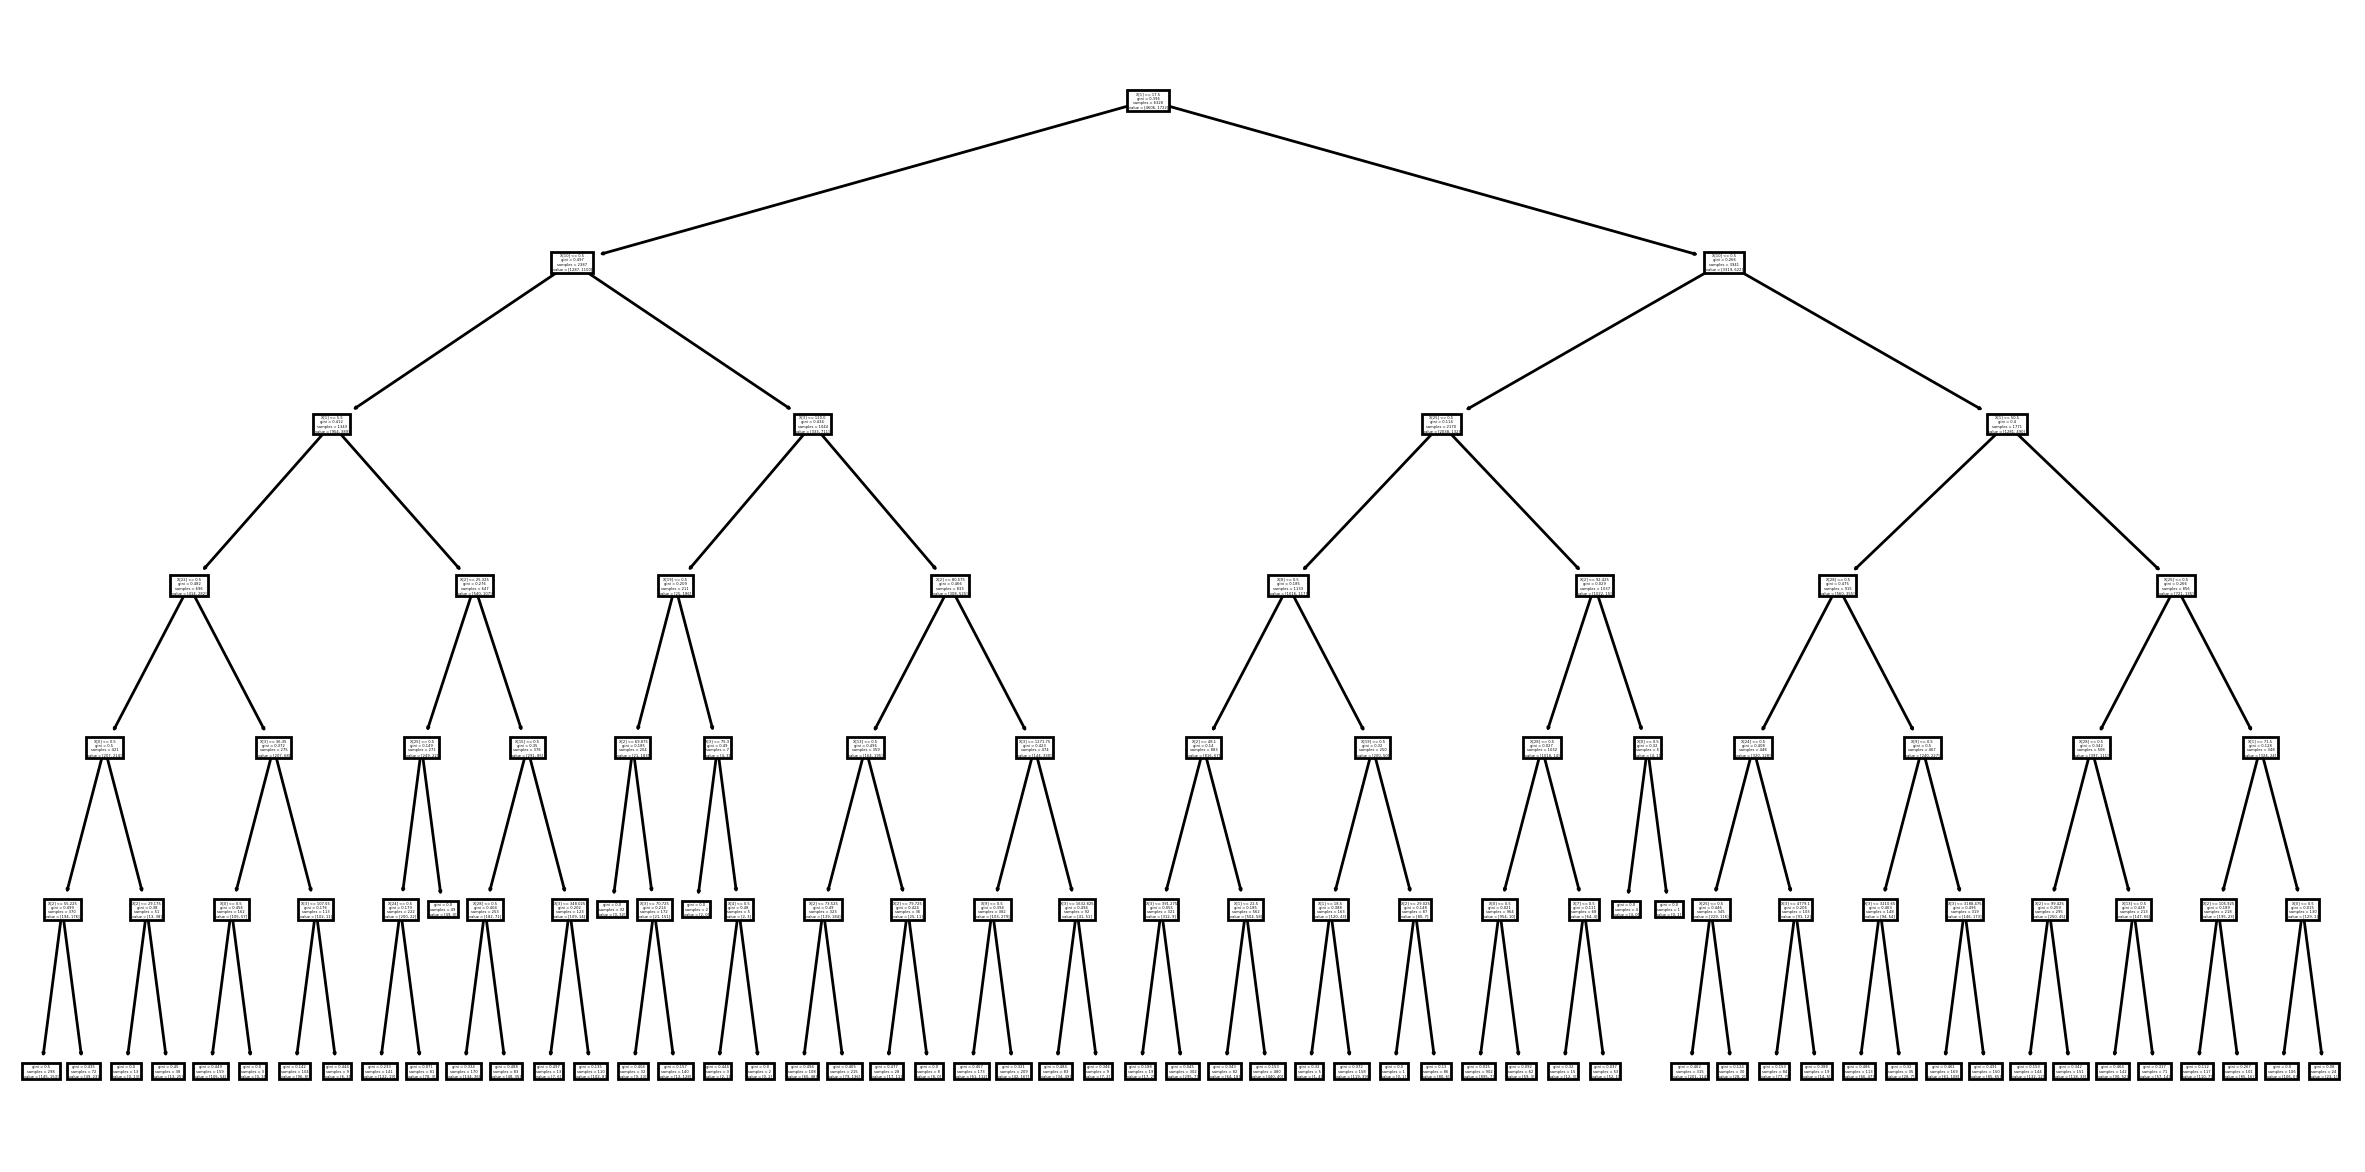

In [79]:
plt.figure(
    figsize=(15, 7.5),
    dpi=200
)
plot_tree(dt);

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf=RandomForestClassifier(
    max_depth=6
)

In [105]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [106]:
preds=rf.predict(X_test)

In [107]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.61      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.81       704



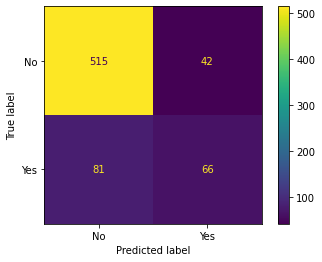

In [108]:
plot_confusion_matrix(rf, X_test, y_test);

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



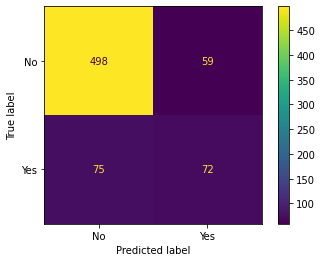

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [109]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [122]:
ada_model=AdaBoostClassifier(
    n_estimators=100
)

In [123]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [124]:
ada_preds=ada_model.predict(X_test)

In [125]:
gb_model=GradientBoostingClassifier()

In [126]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [127]:
gb_preds=gb_model.predict(X_test)

In [128]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



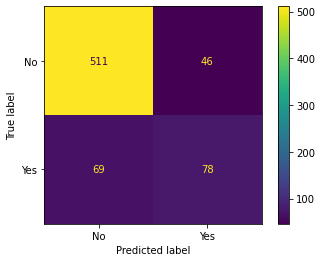

In [129]:
plot_confusion_matrix(ada_model, X_test, y_test);

In [119]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



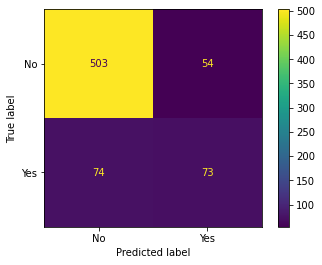

In [121]:
plot_confusion_matrix(gb_model, X_test, y_test);

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



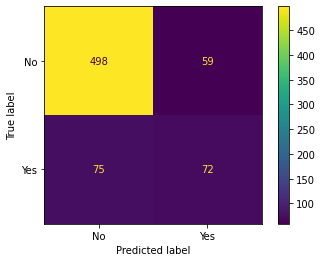

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!